# **Text Processing**

In [ ]:
import numpy as np
import pandas as pd
import string
import re
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

def clean_bangla_text(text):
    if pd.isnull(text):
        return ""
    text = str(text)

    emoji_dict = {
        "😡": "রাগ", "🤬": "রাগ", "😅": "হাসি", "😂": "হাসি",
        "😢": "কান্না", "😭": "কান্না", "😍": "ভালোবাসা",
        "🤢": "ঘৃণা", "😇": "সন্তুষ্ট", "🙄": "অবজ্ঞা"
    }
    for e, r in emoji_dict.items():
      text = text.replace(e, r)
      text = re.sub(r"http\S+|www\S+|https\S+", "", text)
      text = re.sub(r'[0-9]', '', text)
      text = re.sub(r'[\"\'“”‘’]', '', text)
      text = re.sub(r'\b[A-Za-z]+\b', '', text)
      text = re.sub(r'\s+', ' ', text).strip()
      return text

url = "https://docs.google.com/spreadsheets/d/1agOE_LgPa33O6UkWV33lqevrBfzo12Rm/export?format=xlsx"
df = pd.read_excel(url)
print("Original Dataset Size:", df.shape)
df["Sentence_new"] = df["Sentence"].astype(str).apply(clean_bangla_text)
df = df[df["Sentence_new"].str.strip() != ""].reset_index(drop=True)
print("After Cleaning:", df.shape)
df.to_excel("cleaned_dataset.xlsx", index=False)

X = df["Sentence_new"]
y = df["toxic or not"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(df.sample(20))
print(df['toxic or not'].value_counts())


Original Dataset Size: (5047, 2)
After Cleaning: (4913, 3)
                                               Sentence  toxic or not  \
2346                                          ফালতু অয়ি             1   
2555                       অবাজি নেংটাঅলরে নেংটা চিনে🤪🤪             1   
691                                 চরি নাই, বৌ ও নাই😪😪             0   
3908            লুচ্চা জামাই থাহার চেয়ে একলা থাহা বালো             0   
2486  আরে তোর নেত্রী মীরুর টিয়া সোনা চুরি গরি তোর ভা...             1   
79      Baaaji .......... ইয়েন ফরি আত্তুন শরম লার।।।।।             0   
2725                                         কুত্তা আপা             1   
2699                   শালা মানুষ লই বাটপারি গরা বাদ দে             1   
2208        এই কিশোর গ্যাং আরার পটিয়া রে ফোন মারি দের😡😡             1   
2552        ইতারার ব্যবহার যেন সু্নদর হরচুর ও ঐনডিক্কা😛             0   
491                বুয়াইংগার আলুগুলা বেরাই টুলকি মারো👀😃             0   
3785            শুয়োরের বাচ্চারা তুরারে হাড়ি ফেলা উচিত।          

# **Custom RNN**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn (RNN)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - accuracy: 0.4937 - loss: 0.7024 - val_accuracy: 0.4898 - val_loss: 0.6949
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5124 - loss: 0.6965 - val_accuracy: 0.5127 - val_loss: 0.6928
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5174 - loss: 0.6935 - val_accuracy: 0.5127 - val_loss: 0.6929
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4965 - loss: 0.6944 - val_accuracy: 0.4669 - val_loss: 0.7166
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5927 - loss: 0.6784 - val_accuracy: 0.5382 - val_loss: 0.6914
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4684 - loss: 0.7030 - val_accuracy: 0.5178 - val_loss: 0.6953
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5545 - loss: 0.6867 - val_accuracy: 0.5076 - val_loss: 0.7180
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6148 - loss: 0.6603 - val_accuracy: 0.5407 - v

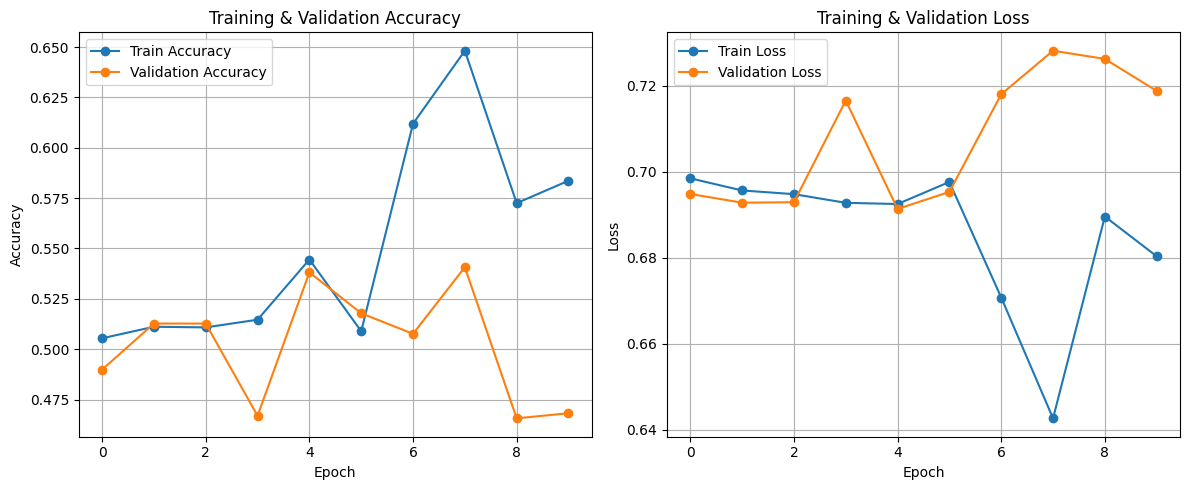

In [ ]:
import numpy as np
import pandas as pd
import re
import string
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, RNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train.astype(str))

X_train_seq = tokenizer.texts_to_sequences(X_train.astype(str))
X_test_seq = tokenizer.texts_to_sequences(X_test.astype(str))

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

class CustomRNNCell(tf.keras.layers.Layer):
    def __init__(self, units):
        super().__init__()
        self.units = units
        self.state_size = units

    def build(self, input_shape):
        self.Wx = self.add_weight(shape=(input_shape[-1], self.units), initializer='glorot_uniform', trainable=True)
        self.Wh = self.add_weight(shape=(self.units, self.units), initializer='orthogonal', trainable=True)
        self.b = self.add_weight(shape=(self.units,), initializer='zeros', trainable=True)
        super().build(input_shape)

    def call(self, inputs, states):
        h_prev = states[0]
        h = tf.tanh(tf.matmul(inputs, self.Wx) + tf.matmul(h_prev, self.Wh) + self.b)
        return h, [h]


model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    RNN(CustomRNNCell(64), return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_split=0.2)

y_pred = (model.predict(X_test_pad) > 0.5).astype(int)
print("✅Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))


def predict_sentence(text):
    clean_text = clean_bangla_text(text)
    seq = tokenizer.texts_to_sequences([clean_text])
    pad = pad_sequences(seq, maxlen=max_len, padding='post')
    pred = model.predict(pad)[0][0]
    return "Toxic Comment Detected" if pred > 0.5 else "Non-Toxic Comment"

custom_text = input()
print(predict_sentence(custom_text))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# **Increase the value of Epoch**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_1 (RNN)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.4937 - loss: 0.7024 - val_accuracy: 0.4898 - val_loss: 0.6949
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5124 - loss: 0.6965 - val_accuracy: 0.5127 - val_loss: 0.6928
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5174 - loss: 0.6935 - val_accuracy: 0.5127 - val_loss: 0.6929
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4967 - loss: 0.6943 - val_accuracy: 0.4593 - val_loss: 0.7145
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5283 - loss: 0.7042 - val_accuracy: 0.4784 - val_loss: 0.6988
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5395 - loss: 0.6924 - val_accuracy: 0.4873 - val_loss: 0.6954
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4862 - loss: 0.6961 - val_accuracy: 0.4873 - val_loss: 0.6940
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4601 - loss: 0.6965 - val_accuracy: 0.4873 - v

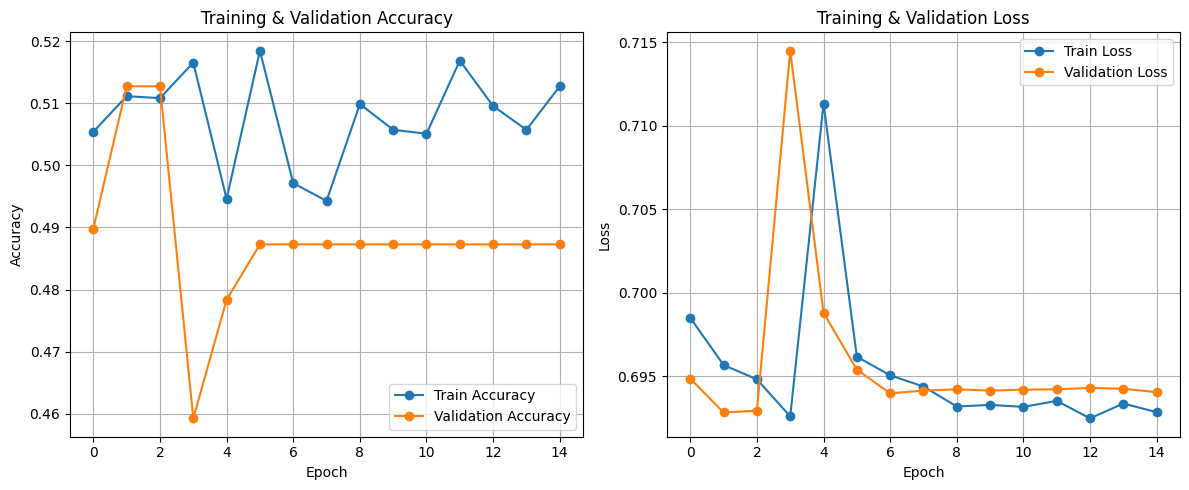

In [ ]:
import numpy as np
import pandas as pd
import re
import string
import tensorflow as tf
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, RNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)


tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train.astype(str))

X_train_seq = tokenizer.texts_to_sequences(X_train.astype(str))
X_test_seq = tokenizer.texts_to_sequences(X_test.astype(str))

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

class CustomRNNCell(tf.keras.layers.Layer):
    def __init__(self, units):
        super().__init__()
        self.units = units
        self.state_size = units

    def build(self, input_shape):
        self.Wx = self.add_weight(shape=(input_shape[-1], self.units), initializer='glorot_uniform', trainable=True)
        self.Wh = self.add_weight(shape=(self.units, self.units), initializer='orthogonal', trainable=True)
        self.b = self.add_weight(shape=(self.units,), initializer='zeros', trainable=True)
        super().build(input_shape)

    def call(self, inputs, states):
        h_prev = states[0]
        h = tf.tanh(tf.matmul(inputs, self.Wx) + tf.matmul(h_prev, self.Wh) + self.b)
        return h, [h]


model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    RNN(CustomRNNCell(64), return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(X_train_pad, y_train, epochs=15, batch_size=64, validation_split=0.2)

y_pred = (model.predict(X_test_pad) > 0.5).astype(int)
print("✅Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))


def predict_sentence(text):
    clean_text = clean_bangla_text(text)
    seq = tokenizer.texts_to_sequences([clean_text])
    pad = pad_sequences(seq, maxlen=max_len, padding='post')
    pred = model.predict(pad)[0][0]
    return "Toxic Comment Detected" if pred > 0.5 else "Non-Toxic Comment"

custom_text = input()
print(predict_sentence(custom_text))


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# **Decrease Epochs**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_2 (RNN)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.5305 - loss: 0.6960 - val_accuracy: 0.3880 - val_loss: 0.7522
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4921 - loss: 0.7122 - val_accuracy: 0.4873 - val_loss: 0.6934
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4929 - loss: 0.6984 - val_accuracy: 0.5127 - val_loss: 0.6930
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4844 - loss: 0.6958 - val_accuracy: 0.4873 - val_loss: 0.6933
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4897 - loss: 0.6952 - val_accuracy: 0.4975 - val_loss: 0.6935
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
✅Accuracy: 0.4852492370295015
              precision    recall  f1-score   support

           0       0.36      0.07      0.12       481
           1       0.50      0.88      0.64       502

    accuracy                           0.49       983
   macro avg       0.43      0.48      0.38       983
weighted avg       0.43     

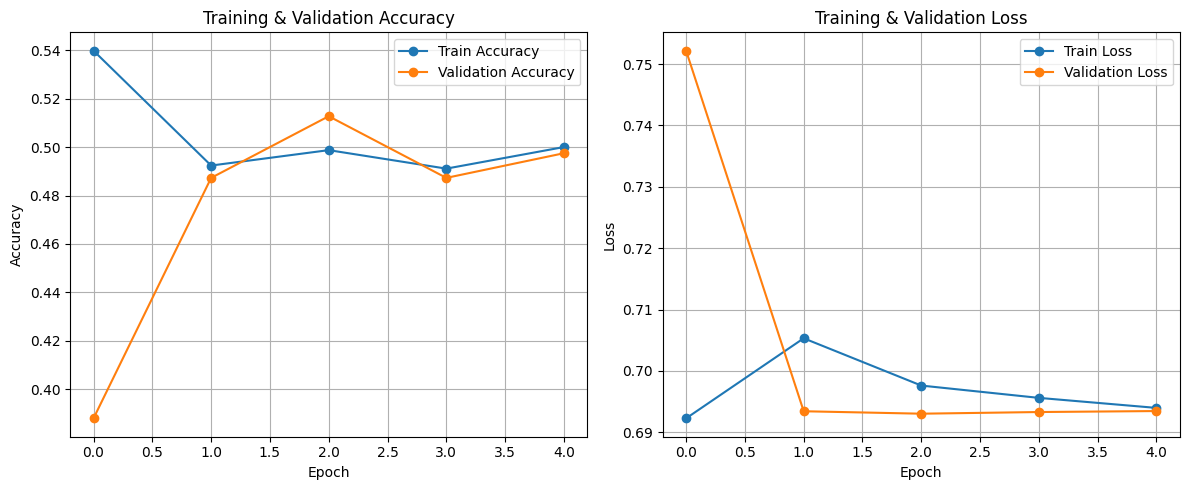

In [ ]:
import numpy as np
import pandas as pd
import re
import string
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, RNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train.astype(str))

X_train_seq = tokenizer.texts_to_sequences(X_train.astype(str))
X_test_seq = tokenizer.texts_to_sequences(X_test.astype(str))

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

class CustomRNNCell(tf.keras.layers.Layer):
    def __init__(self, units):
        super().__init__()
        self.units = units
        self.state_size = units

    def build(self, input_shape):
        self.Wx = self.add_weight(shape=(input_shape[-1], self.units), initializer='glorot_uniform', trainable=True)
        self.Wh = self.add_weight(shape=(self.units, self.units), initializer='orthogonal', trainable=True)
        self.b = self.add_weight(shape=(self.units,), initializer='zeros', trainable=True)
        super().build(input_shape)

    def call(self, inputs, states):
        h_prev = states[0]
        h = tf.tanh(tf.matmul(inputs, self.Wx) + tf.matmul(h_prev, self.Wh) + self.b)
        return h, [h]


model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    RNN(CustomRNNCell(64), return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_split=0.2)

y_pred = (model.predict(X_test_pad) > 0.5).astype(int)
print("✅Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))


def predict_sentence(text):
    clean_text = clean_bangla_text(text)
    seq = tokenizer.texts_to_sequences([clean_text])
    pad = pad_sequences(seq, maxlen=max_len, padding='post')
    pred = model.predict(pad)[0][0]
    return "Toxic Comment Detected" if pred > 0.5 else "Non-Toxic Comment"

custom_text = input()
print(predict_sentence(custom_text))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### **Using Early Stopping**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_3 (RNN)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.4899 - loss: 0.6962 - val_accuracy: 0.5357 - val_loss: 0.6906
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5380 - loss: 0.6938 - val_accuracy: 0.4616 - val_loss: 0.7037
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5521 - loss: 0.6906 - val_accuracy: 0.5357 - val_loss: 0.6916
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4988 - loss: 0.6990 - val_accuracy: 0.5357 - val_loss: 0.6909
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
✅ Accuracy: 0.4820295983086681
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       490
           1       0.48      1.00      0.65       456

    accuracy                           0.48       946
   macro avg       0.24      0.50      0.33       946
weighted avg       0.23      0.48      0.31       946



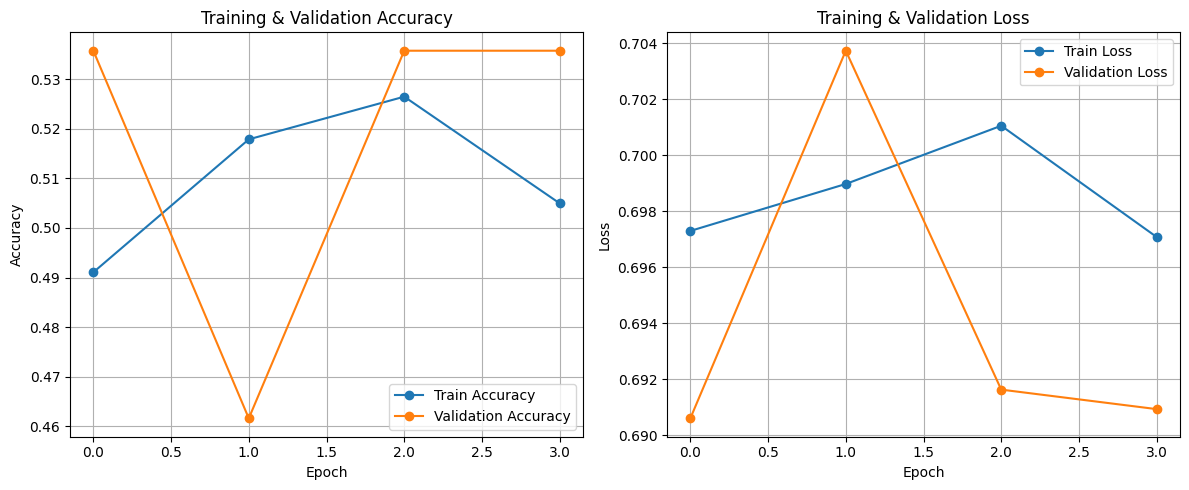

মিডিয়া পাড়ার যে যত লুচ্চামি গরে ইবার ক্যারিয়ার...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
🔴 Toxic Comment Detected


In [ ]:
import numpy as np
import pandas as pd
import re
import string
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, RNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train.astype(str))

X_train_seq = tokenizer.texts_to_sequences(X_train.astype(str))
X_test_seq = tokenizer.texts_to_sequences(X_test.astype(str))

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

class CustomRNNCell(tf.keras.layers.Layer):
    def __init__(self, units):
        super().__init__()
        self.units = units
        self.state_size = units

    def build(self, input_shape):
        self.Wx = self.add_weight(shape=(input_shape[-1], self.units), initializer='glorot_uniform', trainable=True)
        self.Wh = self.add_weight(shape=(self.units, self.units), initializer='orthogonal', trainable=True)
        self.b = self.add_weight(shape=(self.units,), initializer='zeros', trainable=True)
        super().build(input_shape)

    def call(self, inputs, states):
        h_prev = states[0]
        h = tf.tanh(tf.matmul(inputs, self.Wx) + tf.matmul(h_prev, self.Wh) + self.b)
        return h, [h]


model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    RNN(CustomRNNCell(64), return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


history = model.fit(
    X_train_pad, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop]
)


y_pred = (model.predict(X_test_pad) > 0.5).astype(int)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))


def predict_sentence(text):
    clean_text = clean_bangla_text(text)
    seq = tokenizer.texts_to_sequences([clean_text])
    pad = pad_sequences(seq, maxlen=max_len, padding='post')
    pred = model.predict(pad)[0][0]
    return "🔴 Toxic Comment Detected" if pred > 0.5 else "🟢 Non-Toxic Comment"




plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

custom_text =input()
print(predict_sentence(custom_text))


# **Dropout level change**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_3 (RNN)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.5156 - loss: 0.6974 - val_accuracy: 0.5140 - val_loss: 0.6977
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5949 - loss: 0.6636 - val_accuracy: 0.5522 - val_loss: 0.7066
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4972 - loss: 0.7141 - val_accuracy: 0.4873 - val_loss: 0.6955
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4975 - loss: 0.7008 - val_accuracy: 0.4873 - val_loss: 0.6945
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4883 - loss: 0.6976 - val_accuracy: 0.4873 - val_loss: 0.6946
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4839 - loss: 0.6975 - val_accuracy: 0.4873 - val_loss: 0.6941
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4737 - loss: 0.6978 - val_accuracy: 0.4873 - val_loss: 0.6942
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5023 - loss: 0.6952 - val_accuracy: 0.4873 - v

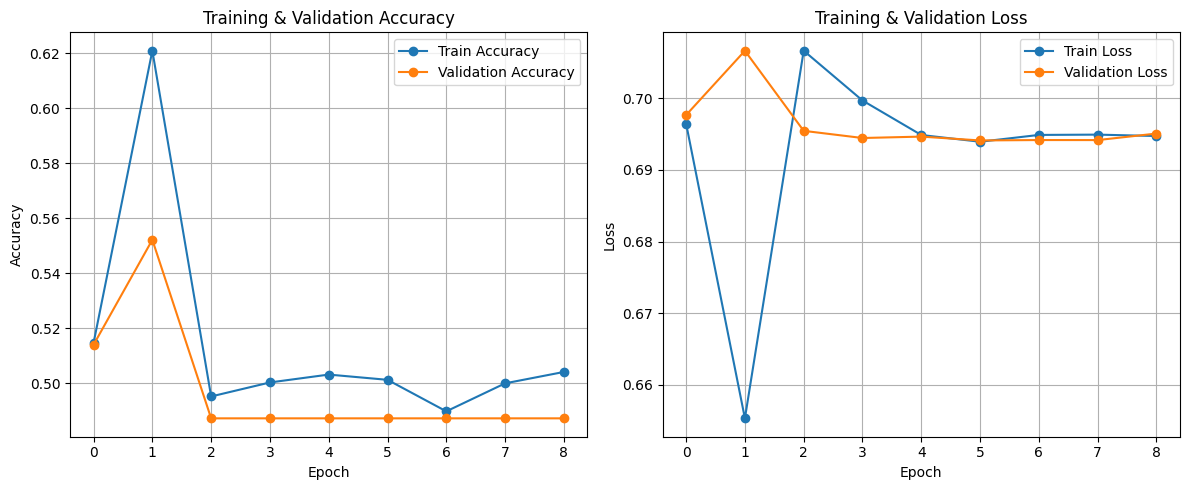

চরি নাই, বৌ ও নাই😪😪
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
🔴 Toxic Comment Detected


In [ ]:
import numpy as np
import pandas as pd
import re
import string
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, RNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train.astype(str))

X_train_seq = tokenizer.texts_to_sequences(X_train.astype(str))
X_test_seq = tokenizer.texts_to_sequences(X_test.astype(str))

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

class CustomRNNCell(tf.keras.layers.Layer):
    def __init__(self, units):
        super().__init__()
        self.units = units
        self.state_size = units

    def build(self, input_shape):
        self.Wx = self.add_weight(shape=(input_shape[-1], self.units), initializer='glorot_uniform', trainable=True)
        self.Wh = self.add_weight(shape=(self.units, self.units), initializer='orthogonal', trainable=True)
        self.b = self.add_weight(shape=(self.units,), initializer='zeros', trainable=True)
        super().build(input_shape)

    def call(self, inputs, states):
        h_prev = states[0]
        h = tf.tanh(tf.matmul(inputs, self.Wx) + tf.matmul(h_prev, self.Wh) + self.b)
        return h, [h]


model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    RNN(CustomRNNCell(64), return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


history = model.fit(
    X_train_pad, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop]
)


y_pred = (model.predict(X_test_pad) > 0.5).astype(int)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))


def predict_sentence(text):
    clean_text = clean_bangla_text(text)
    seq = tokenizer.texts_to_sequences([clean_text])
    pad = pad_sequences(seq, maxlen=max_len, padding='post')
    pred = model.predict(pad)[0][0]
    return "🔴 Toxic Comment Detected" if pred > 0.5 else "🟢 Non-Toxic Comment"


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

custom_text =input()
print(predict_sentence(custom_text))


# **Patience level change**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_4 (RNN)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.5129 - loss: 0.6952 - val_accuracy: 0.5025 - val_loss: 0.6937
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5421 - loss: 0.6947 - val_accuracy: 0.4873 - val_loss: 0.7483
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6018 - loss: 0.6683 - val_accuracy: 0.5267 - val_loss: 0.7095
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4968 - loss: 0.7176 - val_accuracy: 0.4860 - val_loss: 0.7200
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4748 - loss: 0.7197 - val_accuracy: 0.5127 - val_loss: 0.6929
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5082 - loss: 0.7001 - val_accuracy: 0.5127 - val_loss: 0.6928
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5082 - loss: 0.6984 - val_accuracy: 0.5127 - val_loss: 0.6929
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5158 - loss: 0.6986 - val_accuracy: 0.4873 - v

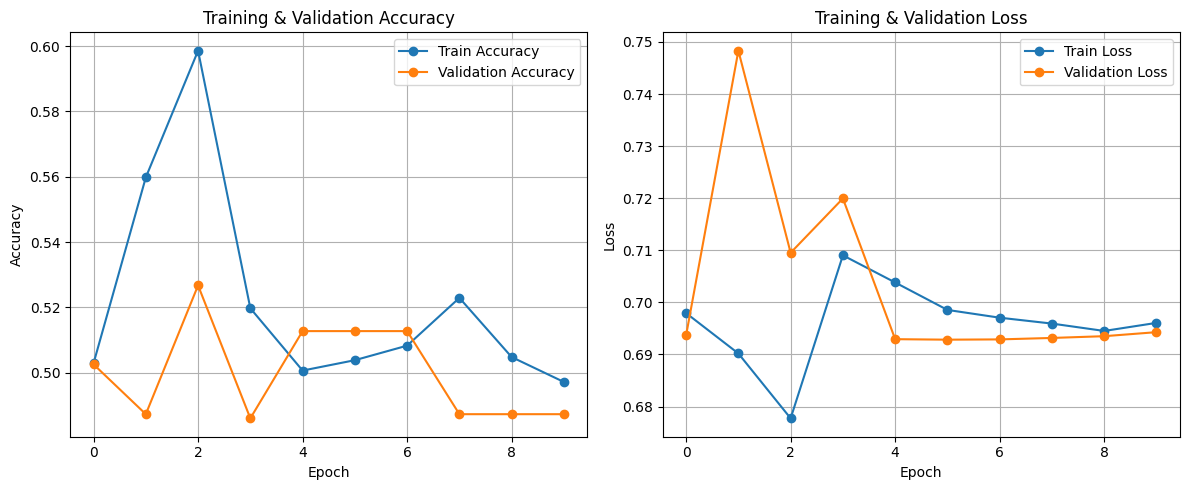

চরি নাই, বৌ ও নাই😪😪
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
🟢 Non-Toxic Comment


In [ ]:
import numpy as np
import pandas as pd
import re
import string
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, RNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train.astype(str))

X_train_seq = tokenizer.texts_to_sequences(X_train.astype(str))
X_test_seq = tokenizer.texts_to_sequences(X_test.astype(str))

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

class CustomRNNCell(tf.keras.layers.Layer):
    def __init__(self, units):
        super().__init__()
        self.units = units
        self.state_size = units

    def build(self, input_shape):
        self.Wx = self.add_weight(shape=(input_shape[-1], self.units), initializer='glorot_uniform', trainable=True)
        self.Wh = self.add_weight(shape=(self.units, self.units), initializer='orthogonal', trainable=True)
        self.b = self.add_weight(shape=(self.units,), initializer='zeros', trainable=True)
        super().build(input_shape)

    def call(self, inputs, states):
        h_prev = states[0]
        h = tf.tanh(tf.matmul(inputs, self.Wx) + tf.matmul(h_prev, self.Wh) + self.b)
        return h, [h]


model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    RNN(CustomRNNCell(64), return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


history = model.fit(
    X_train_pad, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop]
)


y_pred = (model.predict(X_test_pad) > 0.5).astype(int)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))


def predict_sentence(text):
    clean_text = clean_bangla_text(text)
    seq = tokenizer.texts_to_sequences([clean_text])
    pad = pad_sequences(seq, maxlen=max_len, padding='post')
    pred = model.predict(pad)[0][0]
    return "🔴 Toxic Comment Detected" if pred > 0.5 else "🟢 Non-Toxic Comment"



plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

custom_text =input()
print(predict_sentence(custom_text))


# **Using RNN Libarary**


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.4765 - loss: 0.6968 - val_accuracy: 0.5293 - val_loss: 0.6918
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6473 - loss: 0.6622 - val_accuracy: 0.5115 - val_loss: 0.7191
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7060 - loss: 0.6100 - val_accuracy: 0.5127 - val_loss: 0.6936
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5076 - loss: 0.7019 - val_accuracy: 0.5127 - val_loss: 0.6931
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
✅ Accuracy: 0.5584944048830112
              precision    recall  f1-score   support

           0       0.57      0.40      0.47       481
           1       0.55      0.71      0.62       502

    accuracy                           0.56       983
   macro avg       0.56      0.56      0.55       983
weighted avg       0.56      0.56      0.55       983



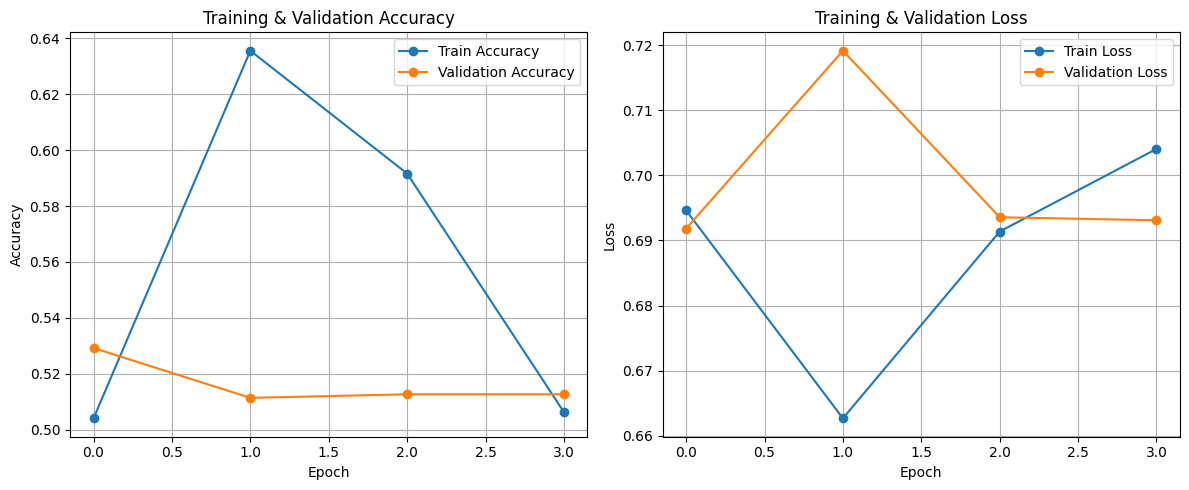

চরি নাই, বৌ ও নাই😪😪
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
🟢 Non-Toxic Comment


In [ ]:
import random
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train.astype(str))

X_train_seq = tokenizer.texts_to_sequences(X_train.astype(str))
X_test_seq = tokenizer.texts_to_sequences(X_test.astype(str))

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    SimpleRNN(16, return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


history = model.fit(
    X_train_pad, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


y_pred = (model.predict(X_test_pad) > 0.5).astype(int)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

def predict_sentence(text):
    clean_text = clean_bangla_text(text)
    seq = tokenizer.texts_to_sequences([clean_text])
    pad = pad_sequences(seq, maxlen=max_len, padding='post')
    pred = model.predict(pad)[0][0]
    return "🔴 Toxic Comment Detected" if pred > 0.5 else "🟢 Non-Toxic Comment"


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


custom_text = input()
import random
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
print(predict_sentence(custom_text))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 100, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,294,465 (4.94 MB)

 Trainable params: 1,294,465 (4.94 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.5001 - loss: 0.6993 - val_accuracy: 0.5053 - val_loss: 0.6929
Epoch 2/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.5463 - loss: 0.6851 - val_accuracy: 0.5013 - val_loss: 0.7082
Epoch 3/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.5545 - loss: 0.6933 - val_accuracy: 0.4669 - val_loss: 0.7102
Epoch 4/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.5259 - loss: 0.7022 - val_accuracy: 0.4775 - val_loss: 0.7061
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step

✅ Accuracy: 0.5359408033826638

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.63      0.59       490
           1       0.52      0.43      0.47       456

    accuracy                           0.54       946
   macro avg       0.53      0.53      0.53       946
weighted avg       0.53      0.54      0.53       946



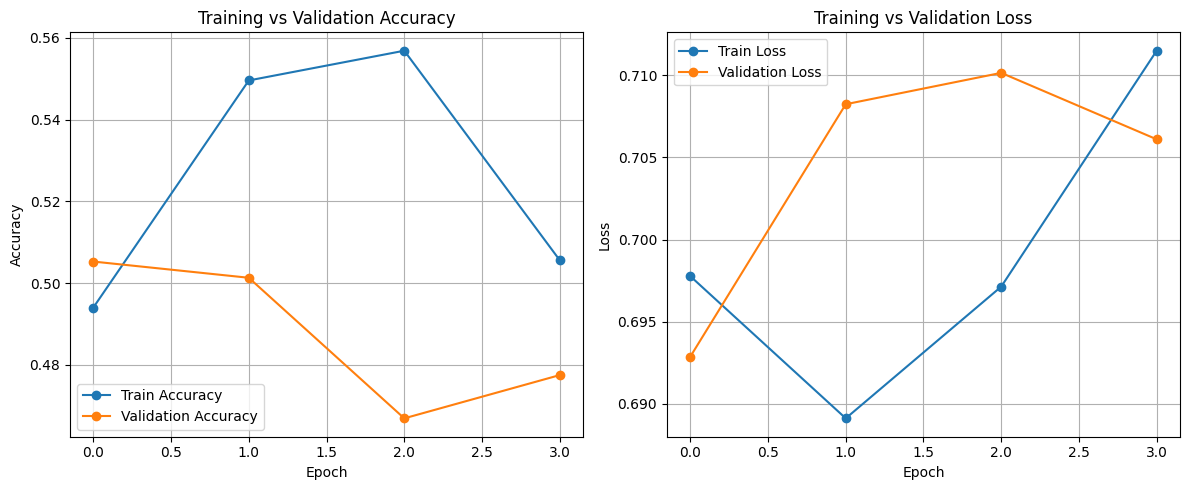

# **Custom LSTM**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_5 (RNN)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - accuracy: 0.4983 - loss: 0.6939 - val_accuracy: 0.4873 - val_loss: 0.6941
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4762 - loss: 0.6946 - val_accuracy: 0.4873 - val_loss: 0.6946
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4949 - loss: 0.6947 - val_accuracy: 0.4873 - val_loss: 0.6944
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5001 - loss: 0.6940 - val_accuracy: 0.4873 - val_loss: 0.6947
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4988 - loss: 0.6944 - val_accuracy: 0.4873 - val_loss: 0.6944
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4996 - loss: 0.6938 - val_accuracy: 0.4873 - val_loss: 0.6944
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4996 - loss: 0.6943 - val_accuracy: 0.4873 - val_loss: 0.6943
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4996 - loss: 0.6938 - val_accuracy: 0.4873 - v

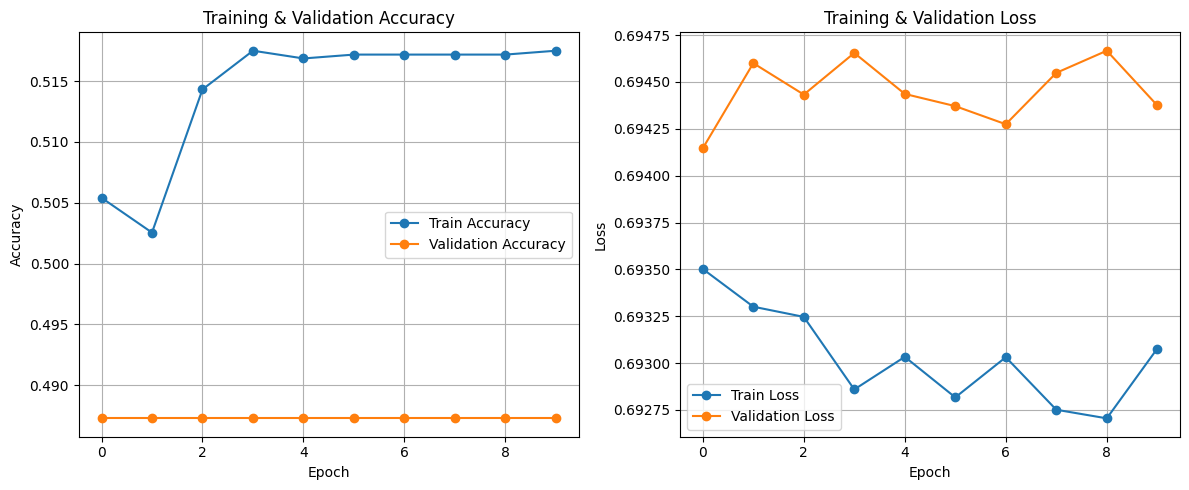

In [ ]:
import numpy as np
import pandas as pd
import string
import re
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, RNN
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train.astype(str))

X_train_seq = tokenizer.texts_to_sequences(X_train.astype(str))
X_test_seq = tokenizer.texts_to_sequences(X_test.astype(str))

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

class CustomLSTMCell(tf.keras.layers.Layer):
    def __init__(self, units):
        super().__init__()
        self.units = units
        self.state_size = [units, units]

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.Wx = self.add_weight(shape=(input_dim, 4 * self.units),
                                  initializer='glorot_uniform', trainable=True)
        self.Wh = self.add_weight(shape=(self.units, 4 * self.units),
                                  initializer='orthogonal', trainable=True)
        self.b = self.add_weight(shape=(4 * self.units,),
                                 initializer='zeros', trainable=True)
        super().build(input_shape)

    def call(self, inputs, states):
        h_prev, c_prev = states
        z = tf.matmul(inputs, self.Wx) + tf.matmul(h_prev, self.Wh) + self.b
        i, f, o, g = tf.split(z, num_or_size_splits=4, axis=1)

        i = tf.sigmoid(i)
        f = tf.sigmoid(f)
        o = tf.sigmoid(o)
        g = tf.tanh(g)
        c = f * c_prev + i * g
        h = o * tf.tanh(c)

        return h, [h, c]

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    RNN(CustomLSTMCell(64), return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


history = model.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_split=0.2)
y_pred = (model.predict(X_test_pad) > 0.5).astype(int)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

def predict_sentence(text):
    clean_text = clean_bangla_text(text)
    seq = tokenizer.texts_to_sequences([clean_text])
    pad = pad_sequences(seq, maxlen=max_len, padding='post')
    pred = model.predict(pad)[0][0]
    return "Toxic Comment Detected" if pred > 0.5 else "Non-Toxic Comment"

custom_text = input("Enter a Bangla sentence: ")
print(predict_sentence(custom_text))
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# **Increasing Epochs**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_6 (RNN)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.4983 - loss: 0.6939 - val_accuracy: 0.4873 - val_loss: 0.6941
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4762 - loss: 0.6946 - val_accuracy: 0.4873 - val_loss: 0.6946
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4949 - loss: 0.6947 - val_accuracy: 0.4873 - val_loss: 0.6944
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5001 - loss: 0.6940 - val_accuracy: 0.4873 - val_loss: 0.6947
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4988 - loss: 0.6944 - val_accuracy: 0.4873 - val_loss: 0.6944
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4996 - loss: 0.6938 - val_accuracy: 0.4873 - val_loss: 0.6944
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4996 - loss: 0.6943 - val_accuracy: 0.4873 - val_loss: 0.6943
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4996 - loss: 0.6938 - val_accuracy: 0.4873 - v

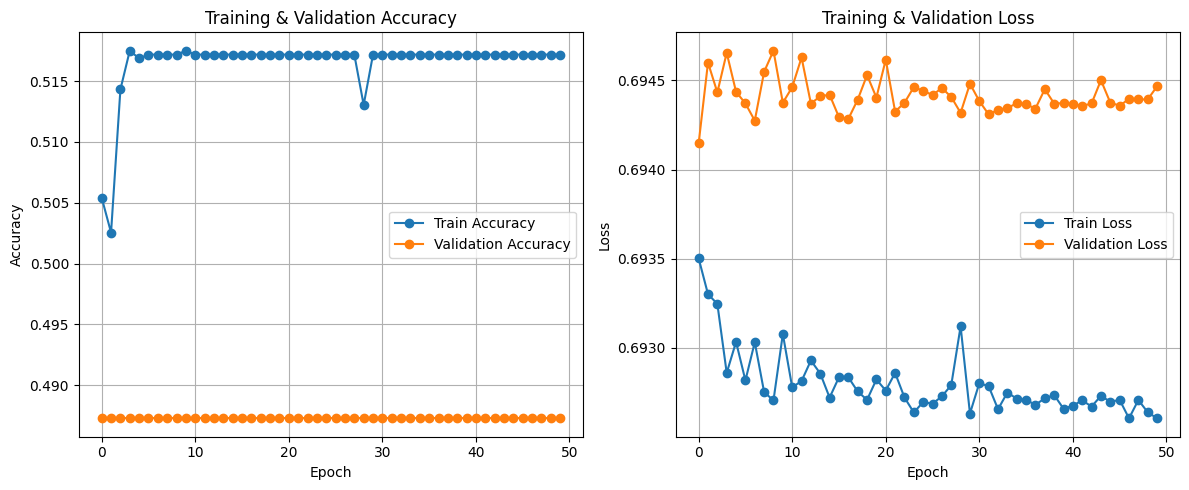

In [ ]:
import numpy as np
import pandas as pd
import string
import re
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, RNN
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train.astype(str))

X_train_seq = tokenizer.texts_to_sequences(X_train.astype(str))
X_test_seq = tokenizer.texts_to_sequences(X_test.astype(str))

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')


class CustomLSTMCell(tf.keras.layers.Layer):
    def __init__(self, units):
        super().__init__()
        self.units = units
        self.state_size = [units, units]

    def build(self, input_shape):
        input_dim = input_shape[-1]

        self.Wx = self.add_weight(shape=(input_dim, 4 * self.units),
                                  initializer='glorot_uniform', trainable=True)

        self.Wh = self.add_weight(shape=(self.units, 4 * self.units),
                                  initializer='orthogonal', trainable=True)

        self.b = self.add_weight(shape=(4 * self.units,),
                                 initializer='zeros', trainable=True)
        super().build(input_shape)

    def call(self, inputs, states):
        h_prev, c_prev = states
        z = tf.matmul(inputs, self.Wx) + tf.matmul(h_prev, self.Wh) + self.b
        i, f, o, g = tf.split(z, num_or_size_splits=4, axis=1)

        i = tf.sigmoid(i)
        f = tf.sigmoid(f)
        o = tf.sigmoid(o)
        g = tf.tanh(g)

        c = f * c_prev + i * g
        h = o * tf.tanh(c)

        return h, [h, c]

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    RNN(CustomLSTMCell(64), return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(X_train_pad, y_train, epochs=50, batch_size=64, validation_split=0.2)

y_pred = (model.predict(X_test_pad) > 0.5).astype(int)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

def predict_sentence(text):
    clean_text = clean_bangla_text(text)
    seq = tokenizer.texts_to_sequences([clean_text])
    pad = pad_sequences(seq, maxlen=max_len, padding='post')
    pred = model.predict(pad)[0][0]
    return "Toxic Comment Detected" if pred > 0.5 else "Non-Toxic Comment"

custom_text = input("Enter a Bangla sentence: ")
print(predict_sentence(custom_text))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# **Increase Epochs**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_7 (RNN)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.4634 - loss: 0.6946 - val_accuracy: 0.4873 - val_loss: 0.6945
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4638 - loss: 0.6950 - val_accuracy: 0.4873 - val_loss: 0.6945
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5005 - loss: 0.6937 - val_accuracy: 0.4873 - val_loss: 0.6950
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4951 - loss: 0.6950 - val_accuracy: 0.4873 - val_loss: 0.6945
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4976 - loss: 0.6942 - val_accuracy: 0.4873 - val_loss: 0.6947
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
✅ Accuracy: 0.5106815869786369
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       481
           1       0.51      1.00      0.68       502

    accuracy                           0.51       983
   macro avg       0.26      0.50      0.34       983
weighted avg       0.26    

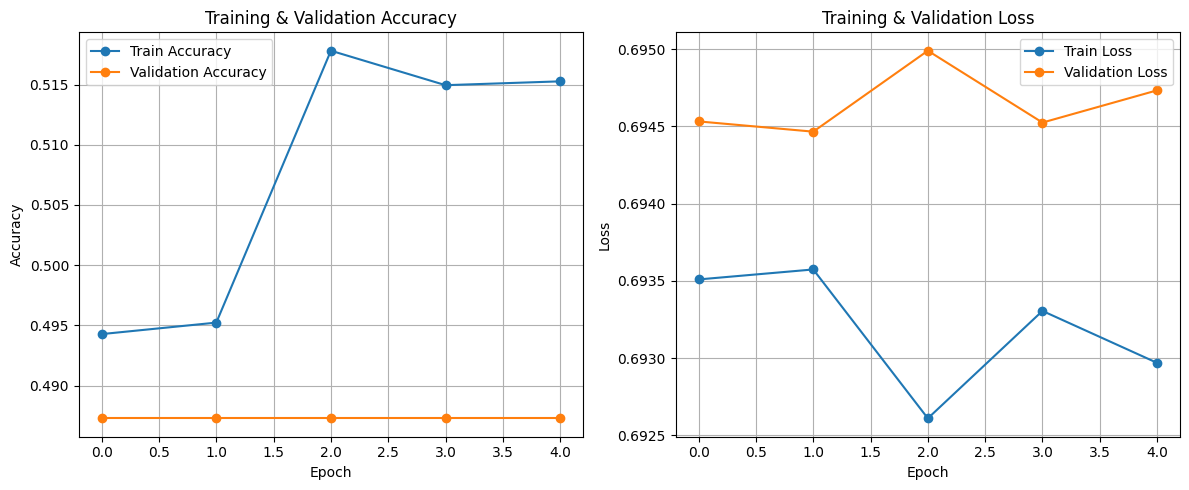

In [ ]:
import numpy as np
import pandas as pd
import string
import re
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, RNN
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train.astype(str))

X_train_seq = tokenizer.texts_to_sequences(X_train.astype(str))
X_test_seq = tokenizer.texts_to_sequences(X_test.astype(str))

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')


class CustomLSTMCell(tf.keras.layers.Layer):
    def __init__(self, units):
        super().__init__()
        self.units = units
        self.state_size = [units, units]

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.Wx = self.add_weight(shape=(input_dim, 4 * self.units),
                                  initializer='glorot_uniform', trainable=True)
        self.Wh = self.add_weight(shape=(self.units, 4 * self.units),
                                  initializer='orthogonal', trainable=True)
        self.b = self.add_weight(shape=(4 * self.units,),
                                 initializer='zeros', trainable=True)
        super().build(input_shape)

    def call(self, inputs, states):
        h_prev, c_prev = states
        z = tf.matmul(inputs, self.Wx) + tf.matmul(h_prev, self.Wh) + self.b
        # Split into 4 gates
        i, f, o, g = tf.split(z, num_or_size_splits=4, axis=1)

        i = tf.sigmoid(i)
        f = tf.sigmoid(f)
        o = tf.sigmoid(o)
        g = tf.tanh(g)
        c = f * c_prev + i * g
        h = o * tf.tanh(c)
        return h, [h, c]

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    RNN(CustomLSTMCell(32), return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_split=0.2)


y_pred = (model.predict(X_test_pad) > 0.5).astype(int)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))


def predict_sentence(text):
    clean_text = clean_bangla_text(text)
    seq = tokenizer.texts_to_sequences([clean_text])
    pad = pad_sequences(seq, maxlen=max_len, padding='post')
    pred = model.predict(pad)[0][0]
    return "Toxic Comment Detected" if pred > 0.5 else "Non-Toxic Comment"

custom_text = input("Enter a Bangla sentence: ")
print(predict_sentence(custom_text))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# **Decrease Epochs**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_8 (RNN)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.4983 - loss: 0.6939 - val_accuracy: 0.4873 - val_loss: 0.6941
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4762 - loss: 0.6946 - val_accuracy: 0.4873 - val_loss: 0.6946
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4949 - loss: 0.6947 - val_accuracy: 0.4873 - val_loss: 0.6944
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5001 - loss: 0.6940 - val_accuracy: 0.4873 - val_loss: 0.6947
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step

✅ Accuracy: 0.5106815869786369

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       481
           1       0.51      1.00      0.68       502

    accuracy                           0.51       983
   macro avg       0.26      0.50      0.34       983
weighted avg       0.26      0.51      0.35       983


Enter a Bangla sentence:  Anikå Firøz Ëva অঁনর বারি চিটাং শরর হন্ড

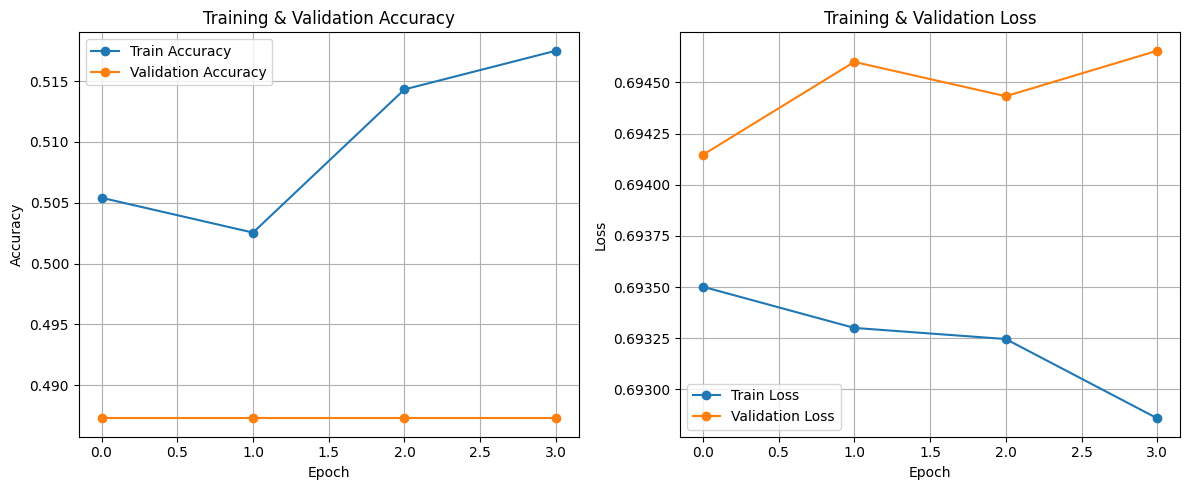

In [ ]:
import numpy as np
import pandas as pd
import string
import re
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, RNN
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train.astype(str))

X_train_seq = tokenizer.texts_to_sequences(X_train.astype(str))
X_test_seq = tokenizer.texts_to_sequences(X_test.astype(str))

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

class CustomLSTMCell(tf.keras.layers.Layer):
    def __init__(self, units):
        super().__init__()
        self.units = units
        self.state_size = [units, units]  # h, c

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.Wx = self.add_weight(shape=(input_dim, 4 * self.units),
                                  initializer='glorot_uniform', trainable=True)
        self.Wh = self.add_weight(shape=(self.units, 4 * self.units),
                                  initializer='orthogonal', trainable=True)
        self.b = self.add_weight(shape=(4 * self.units,),
                                 initializer='zeros', trainable=True)
        super().build(input_shape)

    def call(self, inputs, states):
        h_prev, c_prev = states
        z = tf.matmul(inputs, self.Wx) + tf.matmul(h_prev, self.Wh) + self.b
        i, f, o, g = tf.split(z, num_or_size_splits=4, axis=1)
        i = tf.sigmoid(i)
        f = tf.sigmoid(f)
        o = tf.sigmoid(o)
        g = tf.tanh(g)
        c = f * c_prev + i * g
        h = o * tf.tanh(c)
        return h, [h, c]

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    RNN(CustomLSTMCell(64), return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train_pad, y_train,
    epochs=25,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


y_pred = (model.predict(X_test_pad) > 0.5).astype(int)
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

def predict_sentence(text):
    clean_text = clean_bangla_text(text)
    seq = tokenizer.texts_to_sequences([clean_text])
    pad = pad_sequences(seq, maxlen=max_len, padding='post')
    pred = model.predict(pad)[0][0]
    return " Toxic Comment Detected" if pred > 0.5 else " Non-Toxic Comment"

custom_text = input("\nEnter a Bangla sentence: ")
print(predict_sentence(custom_text))


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# **LSTM Library**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 51s 658ms/step - accuracy: 0.4921 - loss: 0.6953 - val_accuracy: 0.4873 - val_loss: 0.6933
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 33s 665ms/step - accuracy: 0.5126 - loss: 0.6941 - val_accuracy: 0.4873 - val_loss: 0.6950
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 32s 642ms/step - accuracy: 0.4894 - loss: 0.6962 - val_accuracy: 0.5127 - val_loss: 0.6930
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 32s 632ms/step - accuracy: 0.5034 - loss: 0.6944 - val_accuracy: 0.4873 - val_loss: 0.6934
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 637ms/step - accuracy: 0.4940 - loss: 0.6946 - val_accuracy: 0.4873 - val_loss: 0.6941
Epoch 6/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 31s 619ms/step - accuracy: 0.4885 - loss: 0.6946 - val_accuracy: 0.4873 - val_loss: 0.6934
Epoch 7/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 641ms/step - accuracy: 0.5087 - loss: 0.6952 - val_accuracy: 0.4873 - val_loss: 0.6940
Epoch 8/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 40s 622ms/step - accuracy: 0.4945 - loss: 0.6938 - val_accu

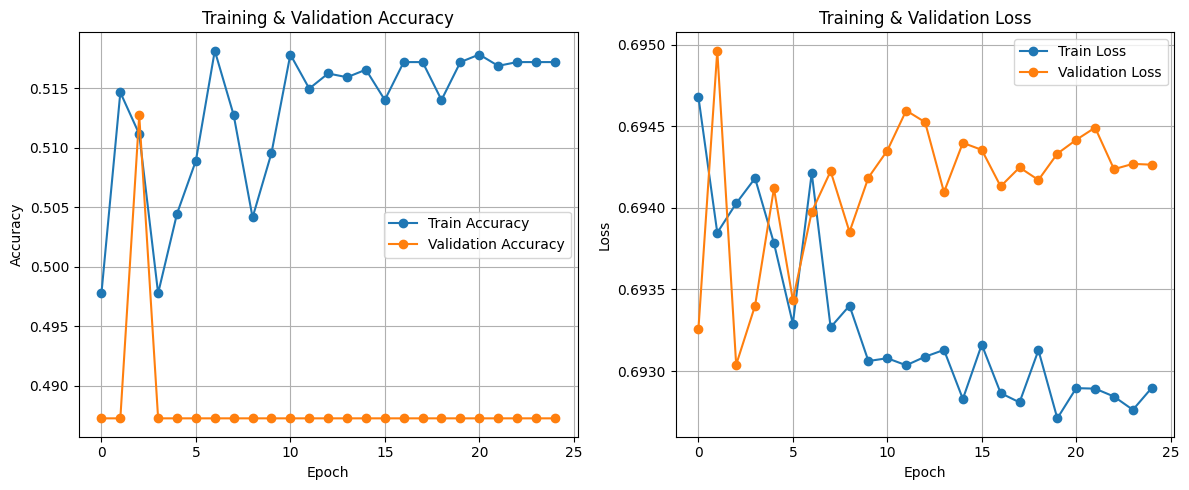


Enter a Bangla sentence: এই কিশোর গ্যাং আরার পটিয়া রে ফোন মারি দেররাগরাগ  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Toxic Comment

Enter a Bangla sentence: আসলেই এনডিল্লা ফালতু বেডিরে অনন্ত জলিল তো পোসা...  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Toxic Comment

Enter a Bangla sentence: Anikå Firøz Ëva অঁনর বারি চিটাং শরর হন্ডে?  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Toxic Comment


In [ ]:
import numpy as np
import pandas as pd
import string
import re
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train.astype(str))

X_train_seq = tokenizer.texts_to_sequences(X_train.astype(str))
X_test_seq = tokenizer.texts_to_sequences(X_test.astype(str))

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    LSTM(128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True),
    LSTM(64, dropout=0.3, recurrent_dropout=0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


history = model.fit(
    X_train_pad, y_train,
    epochs=25,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)


y_pred = (model.predict(X_test_pad) > 0.5).astype(int)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


def predict_sentence(text):
    clean_text = clean_bangla_text(text)
    seq = tokenizer.texts_to_sequences([clean_text])
    pad = pad_sequences(seq, maxlen=max_len, padding='post')
    pred = model.predict(pad)[0][0]
    return "Toxic Comment" if pred > 0.5 else "Non-Toxic Comment"

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

custom_text = input("\nEnter a Bangla sentence: ")
print(predict_sentence(custom_text))
custom_text = input("\nEnter a Bangla sentence: ")
print(predict_sentence(custom_text))
custom_text = input("\nEnter a Bangla sentence: ")
print(predict_sentence(custom_text))


# **LSTM LIbrary With Early Stopping**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 591ms/step - accuracy: 0.4920 - loss: 0.6953

50/50 ━━━━━━━━━━━━━━━━━━━━ 38s 635ms/step - accuracy: 0.4921 - loss: 0.6953 - val_accuracy: 0.4873 - val_loss: 0.6933
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 32s 634ms/step - accuracy: 0.5126 - loss: 0.6941 - val_accuracy: 0.4873 - val_loss: 0.6950
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 614ms/step - accuracy: 0.4890 - loss: 0.6962

50/50 ━━━━━━━━━━━━━━━━━━━━ 33s 653ms/step - accuracy: 0.4894 - loss: 0.6962 - val_accuracy: 0.5127 - val_loss: 0.6930
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 40s 635ms/step - accuracy: 0.5034 - loss: 0.6944 - val_accuracy: 0.4873 - val_loss: 0.6934
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 31s 619ms/step - accuracy: 0.4940 - loss: 0.6946 - val_accuracy: 0.4873 - val_loss: 0.6941
Epoch 6/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 32s 632ms/step - accuracy: 0.4885 - loss: 0.6946 - val_accuracy: 0.4873 - val_loss: 0.6934
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step

✅ Test Accuracy: 0.4893184130213632

Classification Report:
               precision    recall  f1-score   support

           0       0.49      1.00      0.66       481
           1       0.00      0.00      0.00       502

    accuracy                           0.49       983
   macro avg       0.24      0.50      0.33       983
weighted avg       0.24      0.49      0.32       983


Enter a Bangla sentence:  বুয়াইংগার আলুগুলা বেরাই টুলকি মারো👀😃  

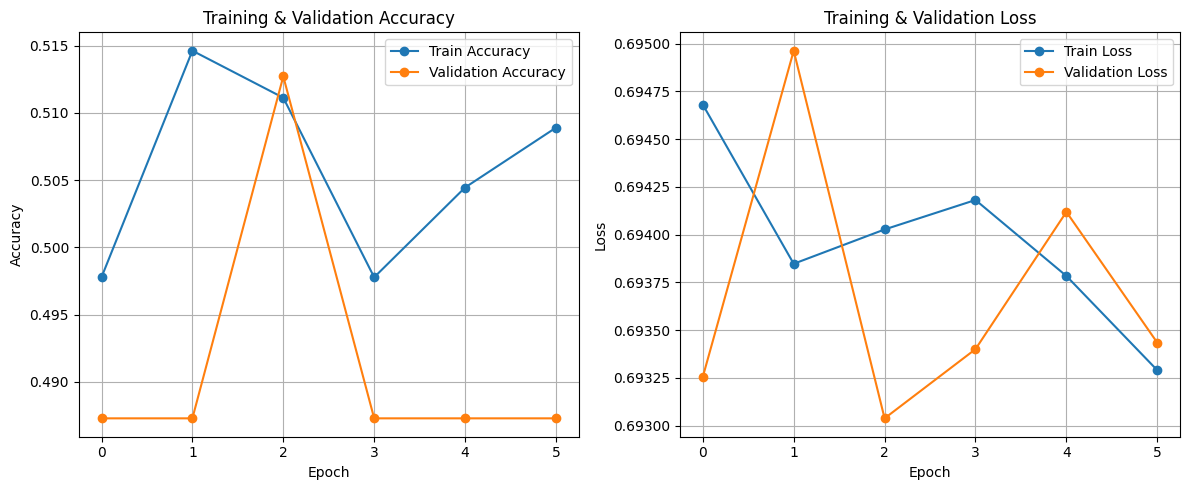

In [ ]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train.astype(str))

X_train_seq = tokenizer.texts_to_sequences(X_train.astype(str))
X_test_seq = tokenizer.texts_to_sequences(X_test.astype(str))

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    LSTM(128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True),
    LSTM(64, dropout=0.3, recurrent_dropout=0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_lstm_model.h5', monitor='val_loss', save_best_only=True)

history = model.fit(
    X_train_pad, y_train,
    epochs=25,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint],
    verbose=1
)


y_pred = (model.predict(X_test_pad) > 0.5).astype(int)
print("\n✅ Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

def predict_sentence(text):
    clean_text = clean_bangla_text(text)
    seq = tokenizer.texts_to_sequences([clean_text])
    pad = pad_sequences(seq, maxlen=max_len, padding='post')
    pred = model.predict(pad)[0][0]
    return "🔥 Toxic Comment Detected" if pred > 0.5 else "💬 Non-Toxic Comment"

custom_text = input("\nEnter a Bangla sentence: ")
print(predict_sentence(custom_text))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## **Using BILSTM Libray**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 581ms/step - accuracy: 0.4915 - loss: 0.6939

50/50 ━━━━━━━━━━━━━━━━━━━━ 39s 624ms/step - accuracy: 0.4920 - loss: 0.6938 - val_accuracy: 0.6310 - val_loss: 0.6870
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 622ms/step - accuracy: 0.6279 - loss: 0.6611

50/50 ━━━━━━━━━━━━━━━━━━━━ 36s 729ms/step - accuracy: 0.6291 - loss: 0.6601 - val_accuracy: 0.7277 - val_loss: 0.5514
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 30s 605ms/step - accuracy: 0.8633 - loss: 0.3577 - val_accuracy: 0.7150 - val_loss: 0.7929
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 580ms/step - accuracy: 0.9391 - loss: 0.1800 - val_accuracy: 0.7099 - val_loss: 0.8741
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 30s 612ms/step - accuracy: 0.9767 - loss: 0.0660 - val_accuracy: 0.6908 - val_loss: 1.1788
Epoch 6/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 582ms/step - accuracy: 0.9887 - loss: 0.0425 - val_accuracy: 0.6858 - val_loss: 1.1526
Epoch 7/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 580ms/step - accuracy: 0.9916 - loss: 0.0276 - val_accuracy: 0.6908 - val_loss: 1.2731
Epoch 8/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 592ms/step - accuracy: 0.9913 - loss: 0.0227 - val_accuracy: 0.6934 - val_loss: 1.2869
Epoch 9/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 590ms/step - accuracy: 0.9935 - loss: 0.0199 - val_accuracy: 0.687

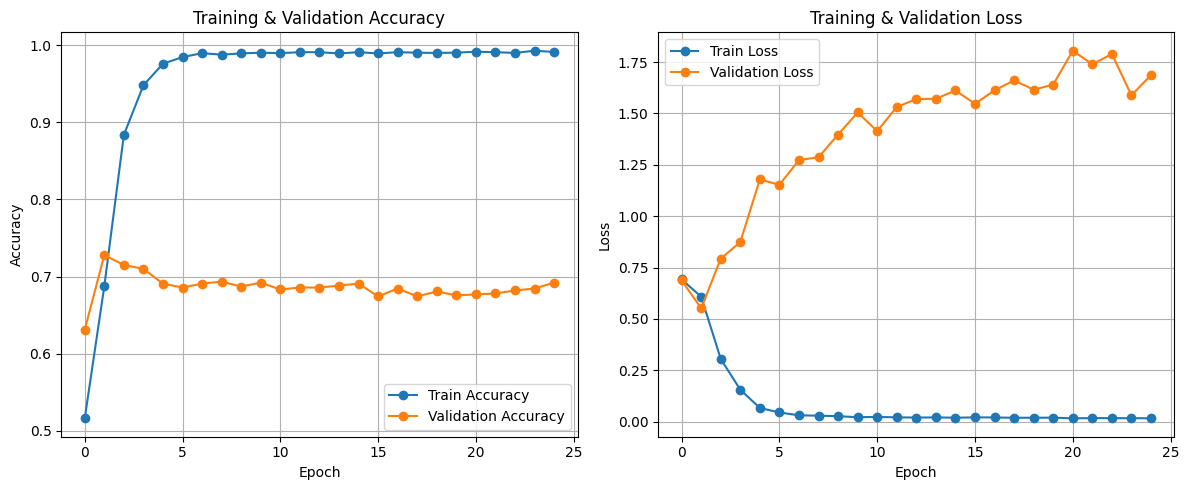

In [ ]:
import numpy as np
import pandas as pd
import string
import re
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train.astype(str))

X_train_seq = tokenizer.texts_to_sequences(X_train.astype(str))
X_test_seq = tokenizer.texts_to_sequences(X_test.astype(str))

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.3)),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

checkpoint = ModelCheckpoint('best_lstm_model.h5', monitor='val_loss', save_best_only=True)
history = model.fit(
    X_train_pad, y_train,
    epochs=25,
    batch_size=64,
    validation_split=0.2,
    callbacks=[checkpoint],
    verbose=1
)


y_pred = (model.predict(X_test_pad) > 0.5).astype(int)
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

def predict_sentence(text):
    clean_text = clean_bangla_text(text)
    seq = tokenizer.texts_to_sequences([clean_text])
    pad = pad_sequences(seq, maxlen=max_len, padding='post')
    pred = model.predict(pad)[0][0]
    return "🧨 Toxic Comment Detected" if pred > 0.5 else "🌿 Non-Toxic Comment"

custom_text = input("\nEnter a Bangla sentence: ")
print(predict_sentence(custom_text))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# **Using BILSTM Early stopping**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 556ms/step - accuracy: 0.4985 - loss: 0.6934

50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 599ms/step - accuracy: 0.4991 - loss: 0.6934 - val_accuracy: 0.6056 - val_loss: 0.6826
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 552ms/step - accuracy: 0.6497 - loss: 0.6476

50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 580ms/step - accuracy: 0.6509 - loss: 0.6465 - val_accuracy: 0.7354 - val_loss: 0.5420
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 30s 595ms/step - accuracy: 0.8655 - loss: 0.3406 - val_accuracy: 0.7201 - val_loss: 0.7133
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 579ms/step - accuracy: 0.9473 - loss: 0.1411 - val_accuracy: 0.6858 - val_loss: 0.8809
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 601ms/step - accuracy: 0.9849 - loss: 0.0606 - val_accuracy: 0.6794 - val_loss: 1.0708
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step

✅ Accuracy: 0.7446592065106816

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.81      0.76       481
           1       0.79      0.68      0.73       502

    accuracy                           0.74       983
   macro avg       0.75      0.75      0.74       983
weighted avg       0.75      0.74      0.74       983


Enter a Bangla sentence: লুচ্চা জামাই থাহার চেয়ে একলা থাহা বালো  
1/

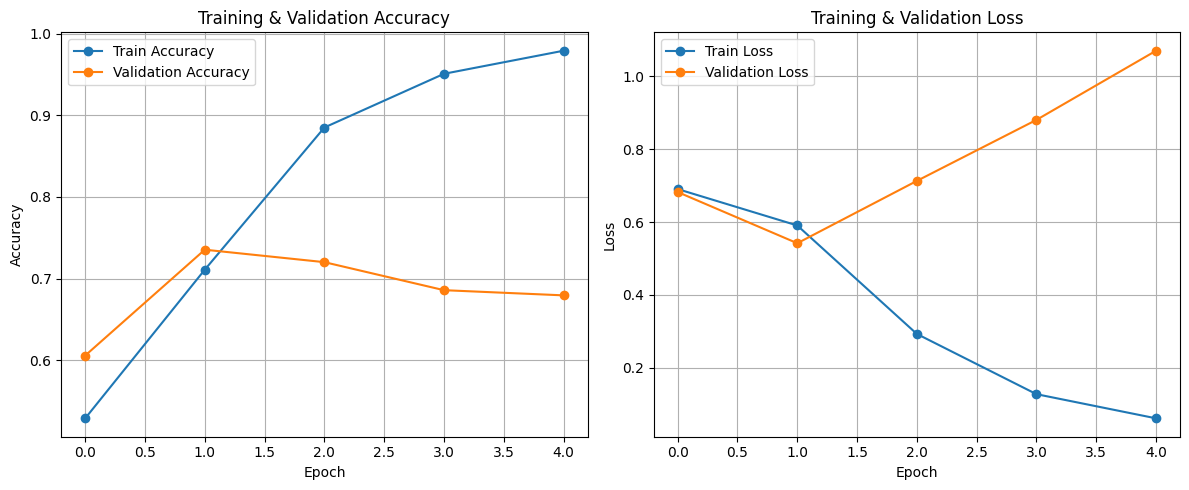

In [ ]:
import numpy as np
import pandas as pd
import string
import re
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train.astype(str))

X_train_seq = tokenizer.texts_to_sequences(X_train.astype(str))
X_test_seq = tokenizer.texts_to_sequences(X_test.astype(str))

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.3)),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_lstm_model.h5', monitor='val_loss', save_best_only=True)

history = model.fit(
    X_train_pad, y_train,
    epochs=25,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

y_pred = (model.predict(X_test_pad) > 0.5).astype(int)
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

def predict_sentence(text):
    clean_text = clean_bangla_text(text)
    seq = tokenizer.texts_to_sequences([clean_text])
    pad = pad_sequences(seq, maxlen=max_len, padding='post')
    pred = model.predict(pad)[0][0]
    return "Toxic Comment Detected" if pred > 0.5 else "Non-Toxic Comment"

custom_text = input("\nEnter a Bangla sentence: ")
print(predict_sentence(custom_text))

custom_text = input("\nEnter a Bangla sentence: ")
print(predict_sentence(custom_text))

custom_text = input("\nEnter a Bangla sentence: ")
print(predict_sentence(custom_text))

custom_text = input("\nEnter a Bangla sentence: ")
print(predict_sentence(custom_text))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# **Final Project using BI-LSTM**

**Note:Type exit to stop taking input proceaa**


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.4949 - loss: 0.6933

50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 322ms/step - accuracy: 0.4955 - loss: 0.6933 - val_accuracy: 0.5789 - val_loss: 0.6839
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.6566 - loss: 0.6489

50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 303ms/step - accuracy: 0.6578 - loss: 0.6477 - val_accuracy: 0.7201 - val_loss: 0.5485
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 301ms/step - accuracy: 0.8680 - loss: 0.3398 - val_accuracy: 0.7163 - val_loss: 0.7122
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 357ms/step - accuracy: 0.9477 - loss: 0.1447 - val_accuracy: 0.7048 - val_loss: 0.8858
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 333ms/step - accuracy: 0.9849 - loss: 0.0550 - val_accuracy: 0.7010 - val_loss: 1.0335
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step

✅ Accuracy: 0.7517802644964394

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.84      0.77       481
           1       0.82      0.66      0.73       502

    accuracy                           0.75       983
   macro avg       0.76      0.75      0.75       983
weighted avg       0.76      0.75      0.75       983

Enter a Bangla sentence: অবাজি নেংটাঅলরে নেংটা চিনে🤪🤪  
1/1 ━━━━━━━━━━━

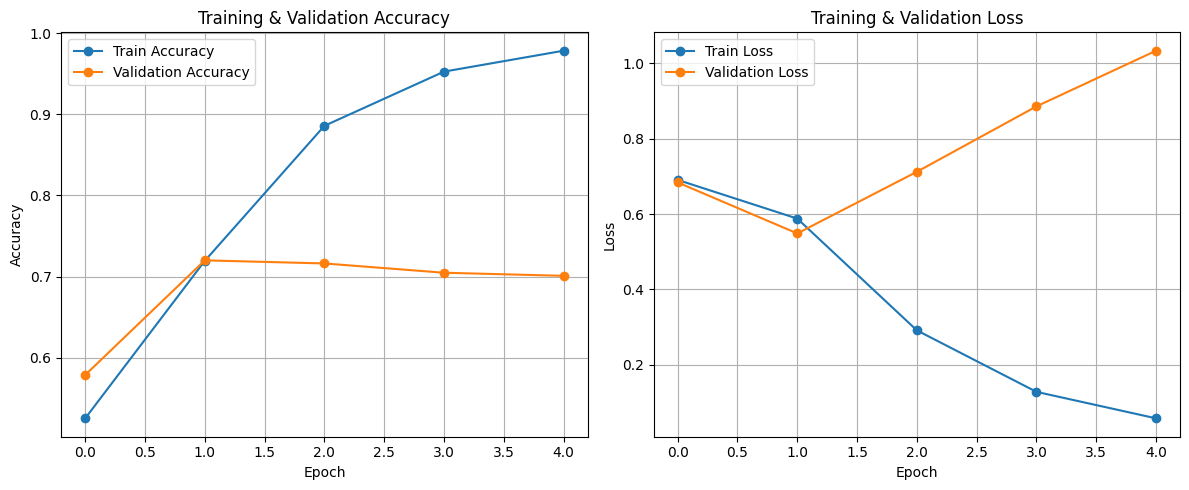

In [ ]:
import numpy as np
import pandas as pd
import string
import re
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train.astype(str))

X_train_seq = tokenizer.texts_to_sequences(X_train.astype(str))
X_test_seq = tokenizer.texts_to_sequences(X_test.astype(str))

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.3)),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_lstm_model.h5', monitor='val_loss', save_best_only=True)

history = model.fit(
    X_train_pad, y_train,
    epochs=25,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

y_pred = (model.predict(X_test_pad) > 0.5).astype(int)
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

def predict_sentence(text):
    clean_text = clean_bangla_text(text)
    seq = tokenizer.texts_to_sequences([clean_text])
    pad = pad_sequences(seq, maxlen=max_len, padding='post')
    pred = model.predict(pad)[0][0]
    return "🧨 Toxic Comment Detected" if pred > 0.5 else "🌿 Non-Toxic Comment"

while True:
    custom_text = input("Enter a Bangla sentence: ")
    if custom_text.lower() == "exit":
        break

    print(predict_sentence(custom_text), "\n")

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()